In [6]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/global/homes/s/severett/repos/balutils/')
from balutils import stacked_catalogs as sc

import seaborn as sb
plt.style.use('seaborn')
sb.set_context("notebook", font_scale=1.5)

%matplotlib inline

In [7]:
run = 'run2' 
ver = '1.4'

balrog_det_file = '/project/projectdirs/des/severett/Balrog/{}/stacked_catalogs/{}/sof/balrog_detection_catalog_sof_{}_v{}.fits'.format(run, ver, run, ver)
det = sc.BalrogDetectionCatalog(balrog_det_file, match_type='sof_only')

cuts = np.where( (det['meas_FLAGS_GOLD_SOF_ONLY'] < 2) &
                 (det['flags_badregions'] < 2) &
                 (det['flags_foreground'] == 0) &
                 (det['flags_footprint'] == 1) &
                 (det['match_flag_1.5_asec'] < 2))
sample = det[cuts]

Removing the following duplicates from detection catalog:
     bal_id    
---------------
100323010415992
1 duplicates removed, catalog size now 19959471


In [10]:
def plot_detection_efficiency(cat, bands='griz', xlim=[16.0, 30.0], ylim=[0.0, 1.0],
                              S=8, title=None, cmap='inferno', dim=2, dx=0.1,
                              vline=None, p='cm', mcol='true_bdf_mag_deredden'):
    
    bindx = dict(zip('griz', range(4)))

    N = 2. / (dx) + 1
    mag_min, mag_max = xlim[0], xlim[1]
    bins = np.linspace(mag_min, mag_max, N)

    IN_BIN = {}
    DET = {}
    EFF = {}
    EFF_ERR = {}
    MAG = {}

    for x in [IN_BIN, DET, EFF, EFF_ERR, MAG]:
        for band in bands:
            x[band] = []

    for band in bands:
        print('Band {}'.format(band))
        bi = bindx[band]
        for i, bstart in enumerate(bins):
            if i == len(bins)-1:
                break
            else:
                # print 'i, bins[i], bins[i+1] = ',i, bins[i], bins[i+1]

                in_bin = len(cat[(bins[i]<=cat[mcol][:,bi]) & (cat[mcol][:,bi]<bins[i+1])])
                det = len(cat[(bins[i]<=cat[mcol][:,bi]) &
                        (cat[mcol][:,bi]<bins[i+1]) &
                        (cat['detected']==1)])
            try:
                eff = 100. * det / in_bin
            except ZeroDivisionError:
                eff = 0.0

            mag = np.mean([bins[i], bins[i+1]])

            try:
                eff_err = eff * np.sqrt( (1. / det) + (1. / det) )
            except ZeroDivisionError:
                eff_err = 0.0

            IN_BIN[band].append(in_bin)
            DET[band].append(det)
            EFF[band].append(eff)
            EFF_ERR[band].append(eff_err)
            MAG[band].append(mag)

    bk = 0
    for band in bands:
        # ax = plt.subplot(2, 2, bi+1)

        plt.errorbar(MAG[band], EFF[band], EFF_ERR[band], fmt='o', ms=8, label=band)
        # plt.gca().axhline(0, ls='--', c='k', lw=4)
        # med = np.median(diff[cuts])
        # ax.axhline(med, ls=':', c='w', lw=3, label='Median={:.3f}'.format(med))
        # cb = plt.colorbar(hb, ax=ax)
        # legend = plt.legend(bbox_to_anchor=(0.6, 0.925), bbox_transform=ax.transAxes, fontsize=18)
        # plt.setp(legend.get_texts(), color='w')

        # label = val
        # if self.use_deredden is True:
        #     label += ' (dereddened)'

        # for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
        #             ax.get_xticklabels() + ax.get_yticklabels()):
        #     item.set_fontsize(20)

    if title: plt.suptitle(title)
    ax = plt.gca()
    ax.set_xlabel('True bdf_mag_deredden')
    ax.set_ylabel('Detection Efficiency')
    plt.legend()

    if vline is not None:
        plt.axvline(vline, linewidth=2, ls='--', color='k')

    plt.gcf().set_size_inches(S, S)

    return

Band i


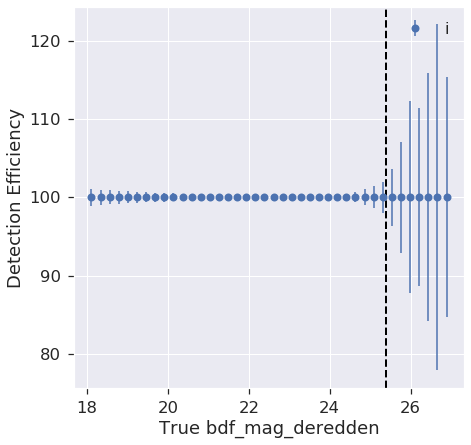

In [14]:
plot_detection_efficiency(sample, bands='i', xlim=[18,27], dx=0.05, S=7, vline=25.4)

Band i


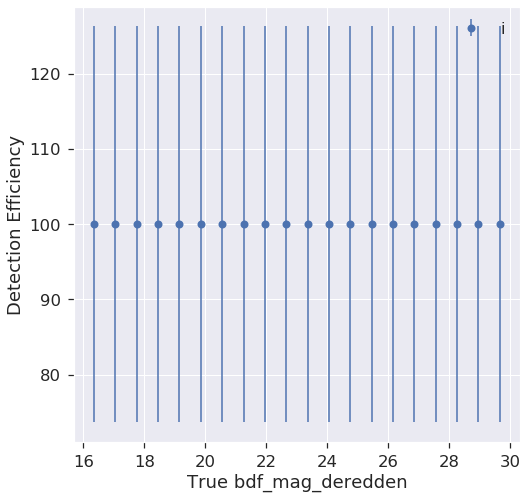

In [25]:
xlim=[16.0, 30.0]
ylim=[0.0, 1.0],
S=8
title=None
cmap='inferno'
dim=2
dx = 0.1
vline=None
p='cm'
mcol='true_bdf_mag_deredden'
    
cat = det
bands = 'i'
    
bindx = dict(zip('griz', range(4)))

N = (2. / dx) + 1
mag_min, mag_max = xlim[0], xlim[1]
bins = np.linspace(mag_min, mag_max, N)

IN_BIN = {}
DET = {}
EFF = {}
EFF_ERR = {}
MAG = {}

for x in [IN_BIN, DET, EFF, EFF_ERR, MAG]:
    for band in bands:
        x[band] = []

for band in bands:
    print('Band {}'.format(band))
    bi = bindx[band]
    for i, bstart in enumerate(bins):
        if i == len(bins)-1:
            break
            
        b1, b2 = bins[i], bins[i+1]
            # print 'i, bins[i], bins[i+1] = ',i, bins[i], bins[i+1]

#             in_bin = len(cat[(bins[i]<=cat[mcol][:,bi]) & (cat[mcol][:,bi]<bins[i+1])])
#             det = len(cat[(bins[i]<=cat[mcol][:,bi]) &
#                     (cat[mcol][:,bi]<bins[i+1]) &
#                     (cat['detected']==1)])

        in_bin = (cat[mcol][:,bi] >= b1) & (cat[mcol][:,bi] < b2)
    
        in
    
        detected = in_bin & (cat['detected'] == 1)
        
        N_in_bin = len(cat[in_bin])
        N_det = len(cat[detected])
    
        try:
            eff = 100. * N_det / N_in_bin
        except ZeroDivisionError:
            eff = 0.0

        mag = np.mean([bins[i], bins[i+1]])

        try:
            eff_err = eff * np.sqrt( (1. / det) + (1. / det) )
        except ZeroDivisionError:
            eff_err = 0.0

        IN_BIN[band].append(in_bin)
        DET[band].append(det)
        EFF[band].append(eff)
        EFF_ERR[band].append(eff_err)
        MAG[band].append(mag)

bk = 0
for band in bands:
    # ax = plt.subplot(2, 2, bi+1)

    plt.errorbar(MAG[band], EFF[band], EFF_ERR[band], fmt='o', ms=8, label=band)
    # plt.gca().axhline(0, ls='--', c='k', lw=4)
    # med = np.median(diff[cuts])
    # ax.axhline(med, ls=':', c='w', lw=3, label='Median={:.3f}'.format(med))
    # cb = plt.colorbar(hb, ax=ax)
    # legend = plt.legend(bbox_to_anchor=(0.6, 0.925), bbox_transform=ax.transAxes, fontsize=18)
    # plt.setp(legend.get_texts(), color='w')

    # label = val
    # if self.use_deredden is True:
    #     label += ' (dereddened)'

    # for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
    #             ax.get_xticklabels() + ax.get_yticklabels()):
    #     item.set_fontsize(20)

if title: plt.suptitle(title)
ax = plt.gca()
ax.set_xlabel('True bdf_mag_deredden')
ax.set_ylabel('Detection Efficiency')
plt.legend()

if vline is not None:
    plt.axvline(vline, linewidth=2, ls='--', color='k')

plt.gcf().set_size_inches(S, S)

In [26]:
EFF

{'i': [100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0]}